In [4]:
import numpy as np

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd 

In [1]:
# Importiong necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [5]:
# Load dataset
data=pd.read_csv("IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Data Analysis

In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

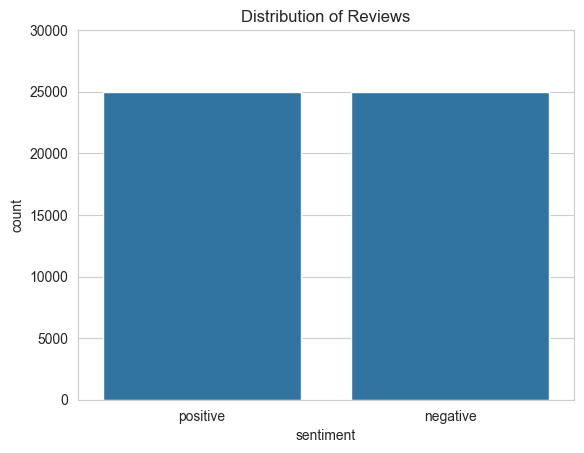

In [6]:
sns.set_style("whitegrid")
sns.countplot(data=data, x='sentiment')
plt.ylim(0, data['sentiment'].value_counts().max() + 5000) 
plt.title("Distribution of Reviews")
plt.show()

In [ ]:
# Data Preprocessing

In [7]:
# Mapping sentiment values to numerical values
df={'positive':1,'negative':0}
data['sentiment']=data['sentiment'].map(df)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [8]:
# Making sentiments in lower case
data['review']=data['review'].str.lower()
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [35]:
# Removing HTML tags
from bs4 import BeautifulSoup

def remove_html_tags(data):
    soup = BeautifulSoup(data, 'html.parser')
    cleaned_data = soup.get_text()
    return cleaned_data
data['cleaned_review'] = data['review'].apply(lambda x: remove_html_tags(x))

data.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_8160\328465537.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(data, 'html.parser')


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."


In [36]:
# Removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_URLs(x))
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."


In [37]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_punctuations(x))
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Matteis Love in the Time of Money is a ...


In [38]:
# Removing Special Characters
def remove_special_characters(data):
    data = re.sub(r'[^\w\s]', ' ', data)
    return data
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: remove_special_characters(x))

data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Matteis Love in the Time of Money is a ...


In [39]:
# Removing Numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_numbers(x))
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Matteis Love in the Time of Money is a ...


In [14]:
# Removing Repeating characters from review
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_repeating_char(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


In [40]:
# Remove stopword

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def clean_stopwords(text):
    words = str(text).split()  # Split the text into words
    cleaned_words = [word for word in words if word not in STOPWORDS]  # Remove stopwords
    cleaned_text = " ".join(cleaned_words)  # Join the remaining words with spaces
    return cleaned_text

data['cleaned_review'] = data['cleaned_review'].apply(lambda x: clean_stopwords(x))
data.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching Oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,Basically theres family little boy Jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Matteis Love Time Money visually stunni...


In [63]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer('\\s+', gaps=True)
# data['cleaned_review'] = data['cleaned_review'].apply(tokenizer.tokenize)
# data

In [64]:
data['text'] = data['cleaned_review'].apply(lambda x: ' '.join(x) )
data.head()

,review,sentiment,cleaned_review,text,tokenized_review
0,One of the other reviewers has mentioned that ...,positive,"[One, reviewers, mentioned, watching, Oz, epis...",One reviewers mentioned watching Oz episode yo...,"[One, reviewers, mentioned, watching, Oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, The, filmin...",A wonderful little production The filming tech...,"[A, wonderful, little, production, The, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, wonderful, way, spend, time, hot,...",I thought wonderful way spend time hot summer ...,"[I, thought, wonderful, way, spend, time, hot,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, theres, family, little, boy, Jake,...",Basically theres family little boy Jake thinks...,"[Basically, theres, family, little, boy, Jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Matteis, Love, Time, Money, visually,...",Petter Matteis Love Time Money visually stunni...,"[Petter, Matteis, Love, Time, Money, visually,..."


In [ ]:
# Classification Models

In [65]:
X=data.text
y=data.sentiment

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(40000,)
(10000,)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [68]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(40000, 5000)
(10000, 5000)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [70]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc_nb=accuracy_score(y_test,naive_bayes_pred)
print(test_acc_nb)

0.8541


In [71]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
test_acc_lr = accuracy_score(y_test, logistic_reg_pred)
print(test_acc_lr)

0.8878


In [ ]:
# Confusion Matrix of Models

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

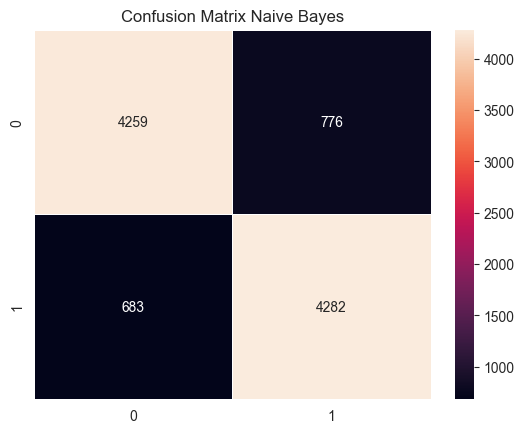

In [56]:
cfm=confusion_matrix(y_test,naive_bayes_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Naive Bayes")

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

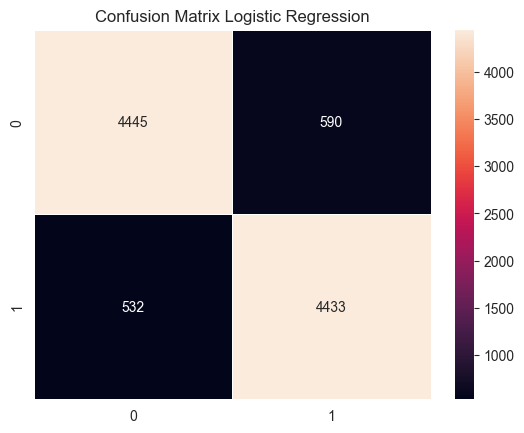

In [72]:
cfm=confusion_matrix(y_test,logistic_reg_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Logistic Regression")